In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [34]:
N = 500
X = np.linspace(0, 20, N)
Y = X / 2. + 1 + sps.norm.rvs(size=N, loc=0, scale=0.2 ** .5)

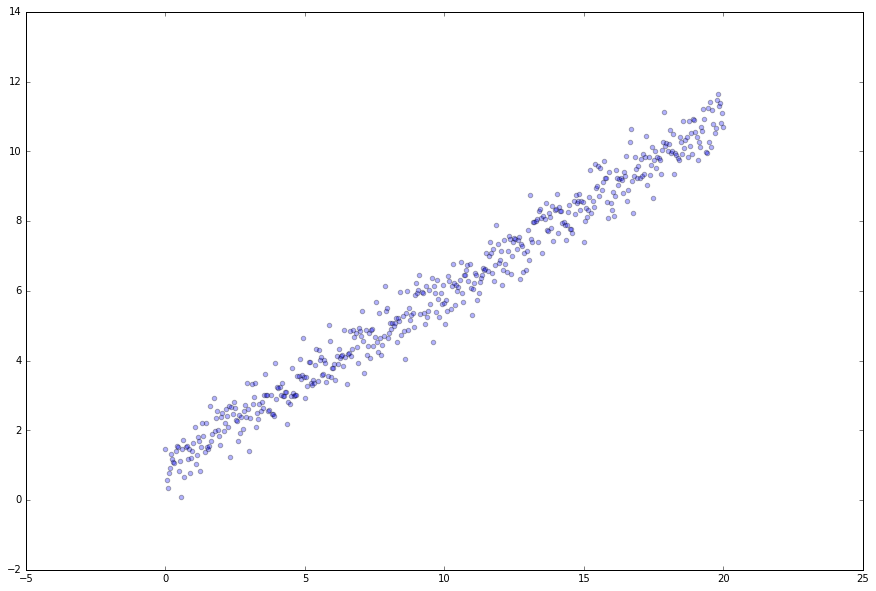

In [36]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y, alpha=0.3)

In [67]:
def mse(arg):
    return mean_squared_error(arg[0]*X+arg[1], Y)
def mae(arg):
    return mean_absolute_error(arg[0]*X+arg[1], Y)

In [37]:
argmin = minimize(mse,x0=[0,0])
print(argmin)
k_mse,b_mse = argmin.x

      fun: 0.2007111027438022
 hess_inv: array([[ 0.01494012, -0.1494012 ],
       [-0.1494012 ,  1.99401196]])
      jac: array([  0.00000000e+00,  -1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49912263,  1.00125313])


In [38]:
argmin = minimize(mae,x0=[0,0])
print(argmin)
k_mae,b_mae = argmin.x

      fun: 0.35474374052888058
 hess_inv: array([[-5429.28797636,  7335.9719186 ],
       [ 7335.9719186 , -9912.25446128]])
      jac: array([ 0.00448899,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 340
      nit: 12
     njev: 82
   status: 2
  success: False
        x: array([ 0.49953562,  0.99455722])


C:\Users\Andrey\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:895: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


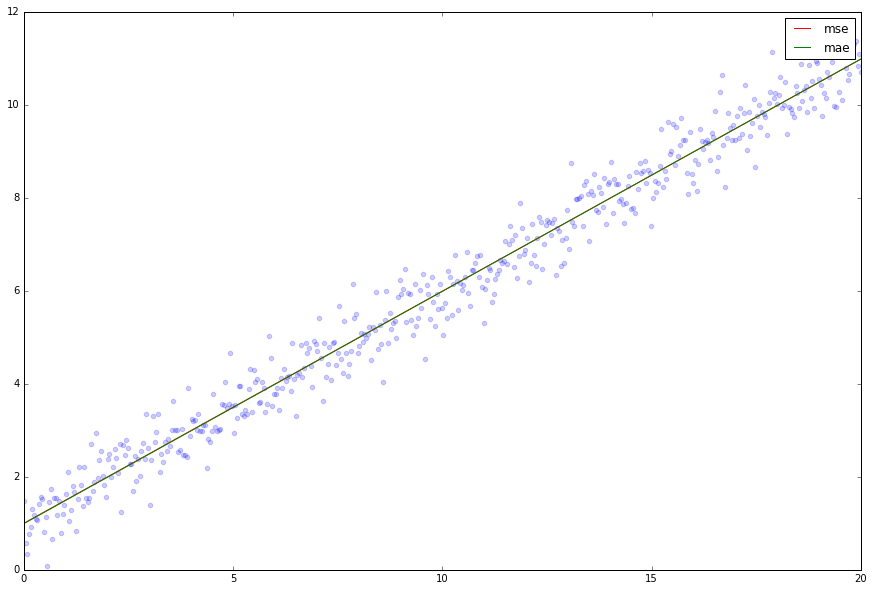

In [48]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', alpha=.2)
plt.plot(X, X * k_mse + b_mse, label='mse', color='red')
plt.plot(X, X * k_mae + b_mae, label='mae', color='green')
plt.xlim(0, 20)
plt.ylim(0, 12)
plt.legend(loc='best')

## Добавляем точки с другим распределением

In [58]:
x1 = [X[i*6] for i in range(75)]
y1 = list(-1 +  sps.norm.rvs(size=75,scale=0.2**0.5))

In [62]:
x = list(X)
y = list(Y)
x.extend(x1)
y.extend(y1)

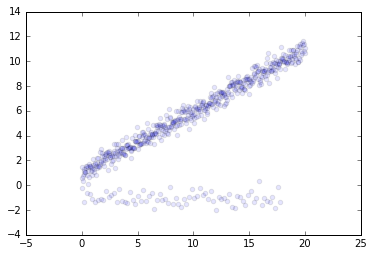

In [65]:
plt.scatter(x, y, alpha=.1)

In [68]:
X = np.array(x)
Y = np.array(y)

In [69]:
argmin = minimize(mse,x0=[0,0])
print(argmin)
k_mse,b_mse = argmin.x

      fun: 5.852908838323769
 hess_inv: array([[ 0.01525566, -0.15036334],
       [-0.15036334,  1.98201606]])
      jac: array([ -1.78813934e-07,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.46918667,  0.45023195])


In [70]:
argmin = minimize(mae,x0=[0,0])
print(argmin)
k_mae,b_mae = argmin.x

      fun: 1.1472955331433166
 hess_inv: array([[ 0.00265464, -0.00306056],
       [-0.00306056,  0.003531  ]])
      jac: array([ 0.0001394 , -0.00173913])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 406
      nit: 14
     njev: 100
   status: 2
  success: False
        x: array([ 0.50097386,  0.88682508])


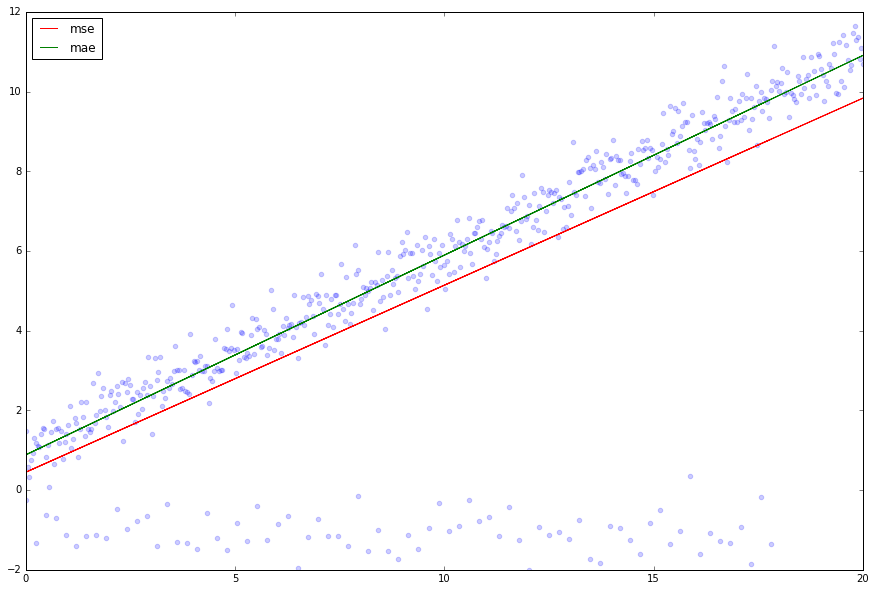

In [72]:
plt.figure(figsize=(15, 10))
plt.scatter(X, Y, color='blue', alpha=.2)
plt.plot(X, X * k_mse + b_mse, label='mse', color='red')
plt.plot(X, X * k_mae + b_mae, label='mae', color='green')
plt.xlim(0, 20)
plt.ylim(-2, 12)
plt.legend(loc='best')

Как видим, при использовании абсолютной ошибки модель получается устойчивее к выбросам. При использовании квадратичной ошибки выбросы дают больший штраф и модель заметно реагирует на них.